# Caso de estidio 3: Titanic with Logistic Regression

<img src='https://climbingcomics.files.wordpress.com/2012/07/logistic-regression1.png?w=994&h=368'>

## Descripción

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## Data

Overview

The data has been split into two groups:

    training set (train.csv)
    test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.
Data Dictionary
Variable	Definition	Key
survival 	Survival 	0 = No, 1 = Yes
pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
sex 	Sex 	
Age 	Age in years 	
sibsp 	# of siblings / spouses aboard the Titanic 	
parch 	# of parents / children aboard the Titanic 	
ticket 	Ticket number 	
fare 	Passenger fare 	
cabin 	Cabin number 	
embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## Importing the Libraries


In [196]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

## Reading the Data

In [197]:
dftest = pd.read_csv("data/test.csv")
dftrain = pd.read_csv("data/train.csv")
dfmovie = dftrain.copy()

In [198]:
dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Here’s the Data Dictionary, so we can understand the columns info better:  
**PassengerID**-type should be integers  
**Survived**-survived or not  
**Pclass**-class of Travel of every passenger  
**Name**- the name of the passenger  
**Sex** -gender  
**Age**-age of passengers  
**SibSp** -No. of siblings/spouse aboard  
**Parch**-No. of parent/child aboard  
**Ticket**-Ticket number  
**Fare** -what Prices they paid  
**Cabin** -cabin number  
**Embarked**-the port in which a passenger has embarked.  
C -Cherbourg , S -Southhampton , Q -Queenstown  

In [199]:
dftrain.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

Ok, podemos ver que son 891 registros en total. Hay columnas con valores nulos, veremos eso más adelante.

In [200]:
dftest.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin          91 
Embarked       418
dtype: int64

**Información** del dataset

In [201]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Estadística **descriptiva** del dataset que nos puede servir.

In [202]:
dftrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Exploratory Data Analysis

Vamos a ver la información faltante en el data frame y trataremos de reemplazarla con información útil. 

### Missing Data

Con Seaborn podemos graficar un heatmap con los datos nulos. En este caso, el amarillo nos dice los fatos nulos y podemos ver que **Age** y sobretodo **Cabin** tienen muchos datos nulos.

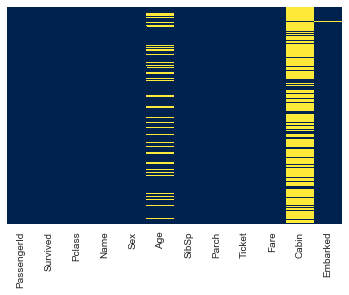

In [203]:
sns.heatmap(dftrain.isnull(),yticklabels=False,cbar=False,cmap='cividis')

Vamos a ver los porcentanjes de datos nulos

In [204]:
null = dftrain.isnull().sum().sort_values(ascending=False)
porcentaje = dftrain.isnull().sum()/dftrain.isnull().count()*100
porcentaje = (round(porcentaje, 2)).sort_values(ascending=False)
missing_data = pd.concat([null, porcentaje], axis=1, keys=['DatosNaN', '% del total'])
missing_data.head(5)

,DatosNaN,% del total
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00


Casi el **20%** de la columna **Age** está faltando. Está proporción es relativamente pequeña y podemos reemplazarla razonablemente mediante el promedio de la información que tenemos. Pero en **Cabin**, la proporción de datos que tenemos es **muy pequeña** por lo que lo más probable es que la ignoremos más adelante.

## Data Visualizations

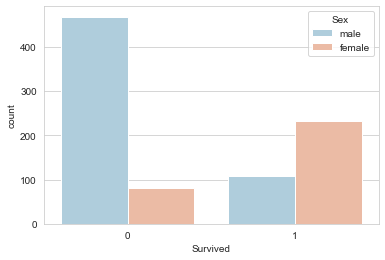

In [205]:
#count-plot of people survided 
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=dftrain, palette='RdBu_r')


Podemos ver que las personas que **no sobrevivieron** tendieron a ser **hombres** y las que sobrevivieron tendieron a ser **mujeres** por más del doble de hombres. 

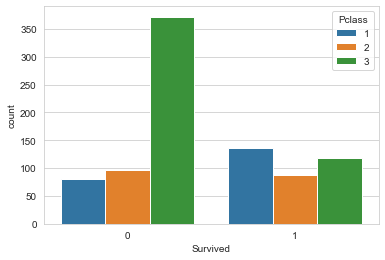

In [206]:
#no. of people who survived according to their Passenger Class
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=dftrain)

Se puede ver que las personas de **Tercera clase** tendieron a no sobrevivir. 

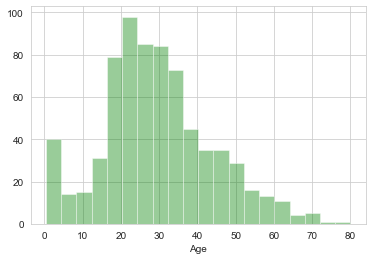

In [207]:
#distribution plot of age of the people
sns.distplot(dftrain['Age'].dropna(), kde=False, bins=20, color='Green')

El **promedio de edad** de la gente que sobrevivió está entre los **20 y 30 años**, y a mayor edad, menor probabilidad de sobrevivir.

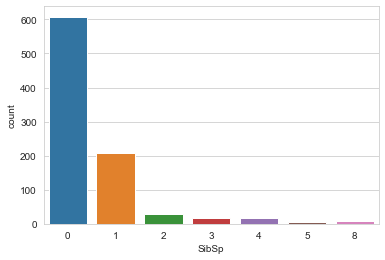

In [208]:
#countplot of the people having siblings or spouce
sns.countplot(x='SibSp',data=dftrain)

Podemos ver que la mayoría de las personas *no* tenían acompañantes (hijos, padres o pareja), mientras que la segunda opción con más frecuencia es *un acompañante*, probablemente, parejas. 

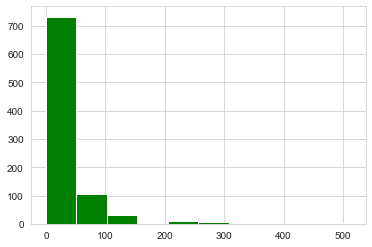

In [209]:
#distribution plot of the ticket fare
dftrain['Fare'].hist(color='green',bins=10)

Vemos que la mayoría de los boletos están entre 0 y 50, lo cuál hace sentido pues la mayoría de los pasajeros era de Tercera Clase. 

## Data Cleaning

Queremos llenar los datos faltantes de *Age* para no eliminar la columna. Podemos simplemente llenarla con la **edad promedio** de los pasajeros, sin embargo podemos hacerlo también por la **edad promedio** de acuerdo a la **Pclass** a la que pertenece. 

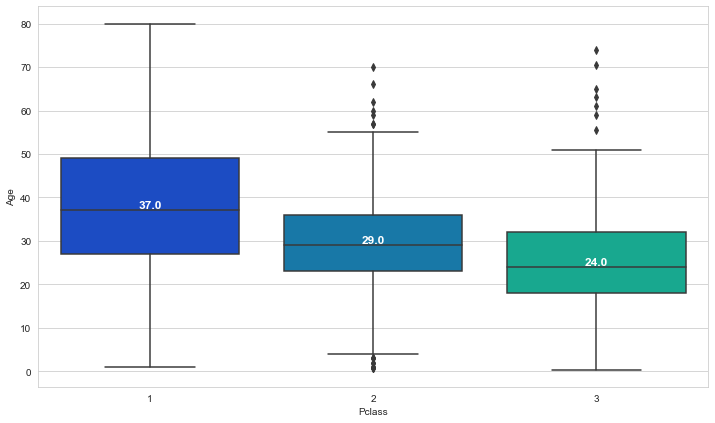

In [210]:
#boxplot with age on y-axis and Passenger class on x-axis.
plt.figure(figsize=(12, 7))
bx=sns.boxplot(x='Pclass',y='Age',data=dftrain,palette='winter')

medians = dftrain.groupby(['Pclass'])['Age'].median().values
median_labels = [str(np.round(s, 0)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,bx.get_xticklabels()):
    bx.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='large', color='w', weight='semibold')

Podemos ver que las clases altas tienden a tener más años, lo cual, tiene sentido. Vamos a usar este **promedio de edad por clase** para llenar nuestros datos faltantes. 

In [211]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

Aplicamos la función.

In [212]:
dftrain['Age'] = dftrain[['Age','Pclass']].apply(impute_age,axis=1)

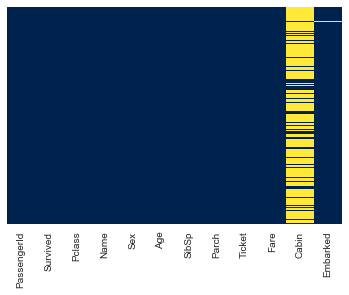

In [213]:
sns.heatmap(dftrain.isnull(),yticklabels=False,cbar=False,cmap='cividis')

Vamos a borrar la columna **Cabin** y las filas nulas de **Embarked**.   
Este sujeto creó una variable nueva para Cabin basado en Embarked: https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8, pero yo no:3, así que vamos a eliminarla. 

In [214]:
dftrain.drop('Cabin',axis=1,inplace=True)
dftrain.dropna(inplace=True)
dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Converting Categorical Features

Vamos a necesitar convertir algunas variables a **variables dummy**, porque de otra forma, el **algoritmo** de **machine learning** no podrá tomar esos valores. 

In [215]:
sex = pd.get_dummies(dftrain['Sex'],drop_first=True)
embark = pd.get_dummies(dftrain['Embarked'],drop_first=True)

#Convert Class also
dftrain['Pclass'] = dftrain['Pclass'].astype(str)
dftrain["Pclass"]= dftrain["Pclass"].replace('1', "FirstClass") 
dftrain["Pclass"]= dftrain["Pclass"].replace('2', "SecondClass") 
dftrain["Pclass"]= dftrain["Pclass"].replace('3', "ThirdClass") 
pclassdummy = pd.get_dummies(dftrain['Pclass'],drop_first=True)

#drop the sex,embarked,name and tickets columns
dftrain.drop(['Sex','Embarked','Name','Ticket', 'Pclass'],axis=1,inplace=True)

#concatenate new sex and embark column to our train dataframe
dftrain = pd.concat([dftrain,sex,embark,pclassdummy],axis=1)

 

#check the head of dataframe
dftrain.head()


,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,SecondClass,ThirdClass
0,1,0,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,1,0,1


In [216]:
dftrain.to_csv('trainminitab.csv')

En la columna male 1 es true, 0 es false(female)  
C -Cherbourg , S -Southhampton , Q -Queenstown
Q S  
1 0 -> Embarked at Q  
0 1 -> Embarked at S  
0 0 -> Embarked at C


Hacer lo mismo en el dataframe del test. NO SE VA A USAR.

## Building a Logistic Regression model

Primero hay que dividir nuestros datos en un **training set** y un **test set**. Había un test file que consideraba que solamente las mujeres sobrevivían, pero no lo vamos a usar. 

### Train Test Split

**X** contendrá todas las variables y **y** la variable **survived**.

In [217]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dftrain.drop('Survived',axis=1), 
           dftrain['Survived'], test_size=0.30, 
            random_state=101)

Aquí **y** es la data que vamos a predecir, todo lo demás van a ser variables de **x**.
Se definió el test a **30%**, y el random state es para que sea random, pero se define un número para que sea igual cada vez que lo corramos. 
Vamos a usar **train_test_split** del módulo **cross_validation** para hacerle **split** a los datos. **70%** de la data será **training data** y **30%** será **testing data**.

### Training and Predicting

Usamos **Regresión Lógistica** entrenar a nuestro modelo. 

In [218]:
from sklearn.linear_model import LogisticRegression
#create an instance and fit the model 
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/Users/jaimesolis/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [219]:
#predictions
Predictions = logmodel.predict(X_test)

Empezamos por importar el paquete **LogisticRegression** del modelo **Linear**.
Después, creamos una instancia del **modelo** de **regresión lógistica** llamado logmodel y después hacerle fit al modelo en el training dataset.   
Vamos a ver qué tan preciso es nuestro modelo para predecir. 

In [220]:
from sklearn.metrics import classification_report
print(classification_report(y_test,Predictions))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       163
           1       0.85      0.67      0.75       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267



In [221]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, Predictions))

[[151  12]
 [ 34  70]]


De la matriz de confusión podemos concluir que:  
**True positive: 151**(Predijimos valores positivos y fueron positivos)  
**True negative: 70**(Predijimos valores negativos y fueron negativos)  
**False positive: 12**(Predijimos valores positivos y fueron negativos)  
**False negative: 34**(Predijimos valores negativos y fueron positivos)  

**Accuracy = (TP+TN)/total**  
**Accuracy = (151+70)/267 ~ 82%**  
**Error Rate = (FP+FN)/total**  
**Error rate = (12+34)/267 ~17%**

In [222]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_test, Predictions))
print("Recall:",recall_score(y_test, Predictions))

Precision: 0.8536585365853658
Recall: 0.6730769230769231


### Coeficiente 1

No se usó

### Tabla de Coeficientes

In [223]:
# statsmodels works nicely with pandas dataframes
import statsmodels.api as sm
from statsmodels.formula.api import logit, glm, ols

dat = pd.DataFrame(dftrain, columns = ['Survived','Age','SibSp','Parch','Fare','male','Q','S', 'SecondClass', 'ThirdClass'])
logit_model = logit('Survived ~ Age + SibSp + Parch + Fare + male + Q + S + SecondClass + ThirdClass',dat).fit()
print (logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.439491
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      879
Method:                           MLE   Df Model:                            9
Date:                Tue, 15 Oct 2019   Pseudo R-squ.:                  0.3394
Time:                        16:26:22   Log-Likelihood:                -390.71
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 6.878e-81
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.2814      0.494      8.660      0.000       3.312       5.250
Age            -0.0424    

Podemos ver que las variables Parch, Fare, Q, y S tienen un P value diferente de cero. Vamos a hacer de nuevo el modelo sin estas varaibles para ver si mejora.

## Second Logistic Regression Model

### Drop variables with high P values

In [224]:
dftest2=dftest.copy()
dftrain2 =dftrain.copy()
dftrain2.drop(['Parch', 'Fare', 'Q', 'S'],axis=1,inplace=True)

In [225]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(dftrain2.drop('Survived',axis=1), 
           dftrain2['Survived'], test_size=0.30, 
            random_state=101)

### Training and Predicting

In [226]:
from sklearn.linear_model import LogisticRegression
#create an instance and fit the model 
logmodel2 = LogisticRegression()
logmodel2.fit(X_train2, y_train2)

/Users/jaimesolis/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [227]:
#predictions
Predictions2 = logmodel2.predict(X_test2)

In [228]:
from sklearn.metrics import classification_report
print(classification_report(y_test2,Predictions2))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       163
           1       0.84      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.82      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [229]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test2, Predictions2))

[[150  13]
 [ 36  68]]


De la matriz de confusión podemos concluir que:  
**True positive: 150**(Predijimos valores positivos y fueron positivos)  
**True negative: 68**(Predijimos valores negativos y fueron negativos)  
**False positive: 13**(Predijimos valores positivos y fueron negativos)  
**False negative: 36**(Predijimos valores negativos y fueron positivos)  

**Accuracy = (TP+TN)/total**  
**Accuracy = (150+68)/417 ~ 81%**  
**Error Rate = (FP+FN)/total**  
**Error rate = (13+36)/417 ~19%**

In [230]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_test2, Predictions2))
print("Recall:",recall_score(y_test2, Predictions2))

Precision: 0.8395061728395061
Recall: 0.6538461538461539


In [231]:
# statsmodels works nicely with pandas dataframes
import statsmodels.api as sm
from statsmodels.formula.api import logit, glm, ols

dat = pd.DataFrame(dftrain, columns = ['Survived','Age','SibSp','male','SecondClass', 'ThirdClass'])
logit_model = logit('Survived ~ Age + SibSp + male + SecondClass + ThirdClass',dat).fit()
print (logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.442360
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      883
Method:                           MLE   Df Model:                            5
Date:                Tue, 15 Oct 2019   Pseudo R-squ.:                  0.3350
Time:                        16:26:22   Log-Likelihood:                -393.26
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 1.860e-83
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.2405      0.422     10.048      0.000       3.413       5.068
Age            -0.0442    

Como podemos ver, remover variables no mejoró nuestro modelo, por lo que nos quedaremos con el modelo completo. 

## Personajes de la pelicula

Vamos a tratar de predicir si los protagonistas de la peli titanic hubieran fallecido. 
Los Datos fueron obtenidos de https://jamescameronstitanic.fandom.com/wiki/James_Cameron%27s_Titanic_Wiki  
Como no viene el precio del boleto, vamos a ver la dispersion para asignar el valor medio:


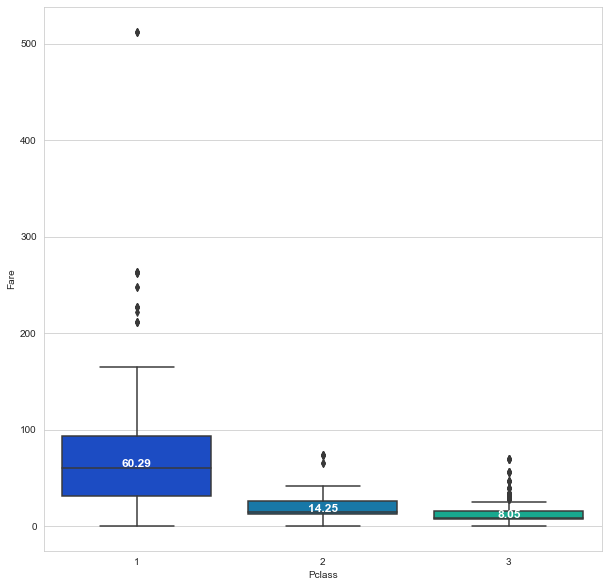

In [232]:
plt.figure(figsize=(10, 10))
bx=sns.boxplot(x='Pclass',y='Fare',data=dfmovie,palette='winter')

medians = dfmovie.groupby(['Pclass'])['Fare'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,bx.get_xticklabels()):
    bx.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='large', color='w', weight='semibold')

La página no trae los precios y algunas edades no están especificadas (sólo dicen por ejemplo born in 1860's), así que elegiremos un aproximado de edad, el resto de los datos, sí los contiene la página. 

In [233]:
# intialise data of lists.
characters = {'Id':['1', '2', '3', '4', '5','6'],
        'Age':[20,17, 30, 50, 20, 45], 
        'SibSp': [0,1,1,0,0,1], 
         'Parch': [0,1,0,1,0,0], 
         'Fare': [8.5, 60.29, 60.29, 60.29, 8.5,60.29], 
       'male':[1,0,1,0,1,0],
       'Q': [0,0,0,0,0,0], 
       'S':[1,1,1,1,1,0], 
       'SecondClass':[0,0,0,0,0,0], 
       'ThirdClass': [1,0,0,0,1,0]}
 
# Create DataFrame
dfmovie = pd.DataFrame(characters)

In [234]:
PredictionsMovie = logmodel.predict(dfmovie)

In [235]:
PredictionsMovie

array([0, 1, 0, 1, 0, 1])

In [236]:
dfmovie.insert(1, "Name", ['Jack Dawson', 'Rose DeWitt Bukater', 'Caledon Hockley (El malo de la peli)', 
                           'Ruth DeWitt Bukater (la mamá de Rose)', 'Fabrizio De Rossi (el amigo de Jack)',
                          'Margaret Brown (la que ayuda a Jack)' ], True) 
dfmovie.insert(2, 'Prediction Survived', PredictionsMovie, True)
dfmovie.insert(3, 'Movie Fate', ['Died in the Atlantic ocean of hypothermia', 'Survived on lifeboat 14',
                                'Escapes on a collapsible lifeboat',
                                'Escapes on lifeboat 6', 'He was killed after being crushed by a falling smokestack',
                                 'Escaped on lifeboat 6'
                                ])


In [237]:
import pandas as pd
from IPython.core.display import HTML


# your images
images = ['https://vignette.wikia.nocookie.net/jamescameronstitanic/images/c/c6/Untitledaksjk.png/revision/latest?cb=20130918130638',
          'https://vignette.wikia.nocookie.net/jamescameronstitanic/images/d/d3/Rosedewittbukater.jpg/revision/latest/scale-to-width-down/235?cb=20120518041253',
         'https://vignette.wikia.nocookie.net/jamescameronstitanic/images/a/a5/Titanical-main1.jpg/revision/latest/scale-to-width-down/1000?cb=20190905221101', 
         'https://vignette.wikia.nocookie.net/jamescameronstitanic/images/d/d6/Ruth_DeWitt_Bukater.gif/revision/latest?cb=20120608235809',
         'https://vignette.wikia.nocookie.net/jamescameronstitanic/images/d/dd/Fabrizio_De_Rossi.png/revision/latest?cb=20140415143817',
         'https://vignette.wikia.nocookie.net/jamescameronstitanic/images/f/f0/Molly_Brown.gif/revision/latest?cb=20120615215650'] 


dfmovie['image'] = images

dfmovie = dfmovie[['Name', 'image', 'Prediction Survived', 'Movie Fate','Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S', 'SecondClass', 'ThirdClass']]

# convert your links to html tags 
def path_to_image_html(path):
    return '<img src="'+ path + '" width="90" >'

pd.set_option('display.max_colwidth', -1)

HTML(dfmovie.to_html(escape=False ,formatters=dict(image=path_to_image_html)))

,Name,image,Prediction Survived,Movie Fate,Age,SibSp,Parch,Fare,male,Q,S,SecondClass,ThirdClass
0,Jack Dawson,,0,Died in the Atlantic ocean of hypothermia,20,0,0,8.50,1,0,1,0,1
1,Rose DeWitt Bukater,,1,Survived on lifeboat 14,17,1,1,60.29,0,0,1,0,0
2,Caledon Hockley (El malo de la peli),,0,Escapes on a collapsible lifeboat,30,1,0,60.29,1,0,1,0,0
3,Ruth DeWitt Bukater (la mamá de Rose),,1,Escapes on lifeboat 6,50,0,1,60.29,0,0,1,0,0
4,Fabrizio De Rossi (el amigo de Jack),,0,He was killed after being crushed by a falling smokestack,20,0,0,8.50,1,0,1,0,1
5,Margaret Brown (la que ayuda a Jack),,1,Escaped on lifeboat 6,45,1,0,60.29,0,0,0,0,0


Podemos ver que el modelo atinó a todos los personajes, salvo uno ya que los tres personajes femeninos eran pasajeros de primera clase entonces era muy probable que se salvaran. Los dos personajes masculinos estaban en tercera clase por lo que era muy probable que no sobrevivieran. El modelo predijo Cal no debía sobrevivir, pero en la pelicula miente para poder subirse en un bote salvavidas>:[
 
